# 1. LOAD DATA

### 1.1 Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Load the dataset

In [2]:
data = pd.read_csv("Bankruptcy.csv")
data

,Bankrupt?,ROA(C) before interest and dep,ROA(A) before interest and % a,ROA(B) before interest and dep,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expend,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder_s Eq,Liability to Equity,Degree of Financial Leverage (,Interest Coverage Ratio (Inter,Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [20]:
data["Liability-Assets Flag"].value_counts()

0    6811
1       8
Name: Liability-Assets Flag, dtype: int64

# 2. EXPLORATORY DATA ANALYSIS

### 2.1 Understanding dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Bankrupt?                       6819 non-null   int64  
 1   ROA(C) before interest and dep  6819 non-null   float64
 2   ROA(A) before interest and % a  6819 non-null   float64
 3   ROA(B) before interest and dep  6819 non-null   float64
 4   Operating Gross Margin          6819 non-null   float64
 5   Realized Sales Gross Margin     6819 non-null   float64
 6   Operating Profit Rate           6819 non-null   float64
 7   Pre-tax net Interest Rate       6819 non-null   float64
 8   After-tax net Interest Rate     6819 non-null   float64
 9   Non-industry income and expend  6819 non-null   float64
 10  Continuous interest rate (afte  6819 non-null   float64
 11  Operating Expense Rate          6819 non-null   float64
 12  Research and development expen  68

In [8]:
data.rename(columns = {'Bankrupt?':'Bankrupt'}, inplace = True)
data.head()

,Bankrupt,ROA(C) before interest and dep,ROA(A) before interest and % a,ROA(B) before interest and dep,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expend,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder_s Eq,Liability to Equity,Degree of Financial Leverage (,Interest Coverage Ratio (Inter,Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
data.shape

(6819, 96)

In [6]:
data.isnull().sum()

Bankrupt                          0
ROA(C) before interest and dep    0
ROA(A) before interest and % a    0
ROA(B) before interest and dep    0
Operating Gross Margin            0
                                 ..
Liability to Equity               0
Degree of Financial Leverage (    0
Interest Coverage Ratio (Inter    0
Net Income Flag                   0
Equity to Liability               0
Length: 96, dtype: int64

In [7]:
print(data['Bankrupt'].value_counts())

0    6599
1     220
Name: Bankrupt, dtype: int64


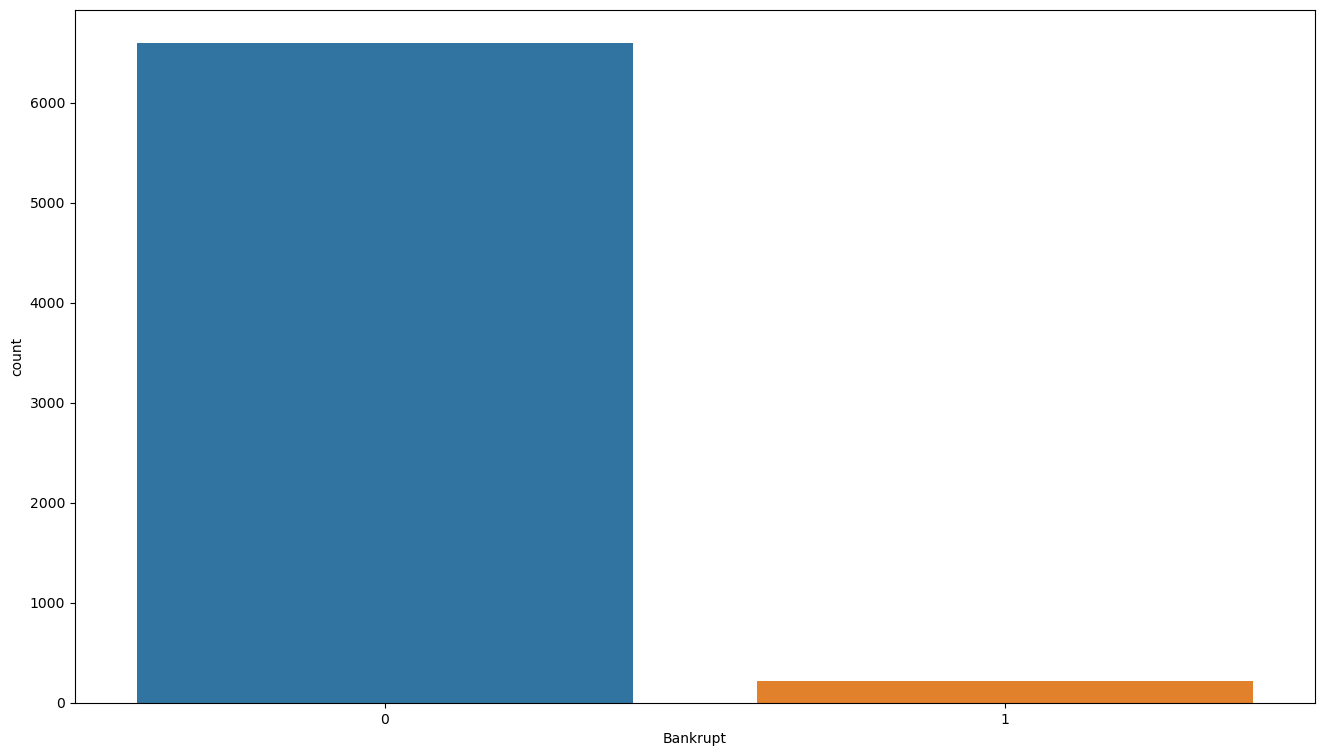

In [8]:
plt.figure(figsize=(16,9))
sns.countplot(x = 'Bankrupt', data = data)
plt.show()


In [9]:
data.describe()

,Bankrupt,ROA(C) before interest and dep,ROA(A) before interest and % a,ROA(B) before interest and dep,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expend,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder_s Eq,Liability to Equity,Degree of Financial Leverage (,Interest Coverage Ratio (Inter,Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


# 3. EDA AND VISUALIZATION

## 3.1 Feature Selection

In [9]:
from sklearn.model_selection import train_test_split

# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif
# to select the features
from sklearn.feature_selection import SelectKBest

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Bankrupt'], axis=1),
    data['Bankrupt'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape


((4773, 95), (2046, 95))

### Determine Mutual Information

In [11]:
mi = mutual_info_classif(X_train, y_train)
mi

array([0.02996614, 0.03316001, 0.03080902, 0.01629343, 0.01691344,
       0.02088061, 0.03072983, 0.0287426 , 0.03003613, 0.03669216,
       0.00212535, 0.00088361, 0.01367885, 0.00177256, 0.01977166,
       0.031147  , 0.02921144, 0.02853528, 0.04329793, 0.00659782,
       0.00396347, 0.02284736, 0.04425628, 0.00858902, 0.0067919 ,
       0.01240081, 0.00968042, 0.01068593, 0.01215344, 0.        ,
       0.01257238, 0.00038593, 0.01365754, 0.00426584, 0.03437709,
       0.01123619, 0.03507135, 0.03437111, 0.01044058, 0.03950706,
       0.00821985, 0.02419305, 0.04305166, 0.00512109, 0.01317813,
       0.        , 0.        , 0.00326798, 0.00100813, 0.00023446,
       0.        , 0.02446493, 0.002054  , 0.02650192, 0.00576042,
       0.00071265, 0.01679241, 0.00290772, 0.00247356, 0.01610328,
       0.01731491, 0.02285962, 0.00142257, 0.00295328, 0.02232087,
       0.02399633, 0.        , 0.03457833, 0.03419604, 0.00907948,
       0.        , 0.00166089, 0.01931201, 0.00205053, 0.00374

### Feature Importance

Text(0, 0.5, 'Mutual Information')

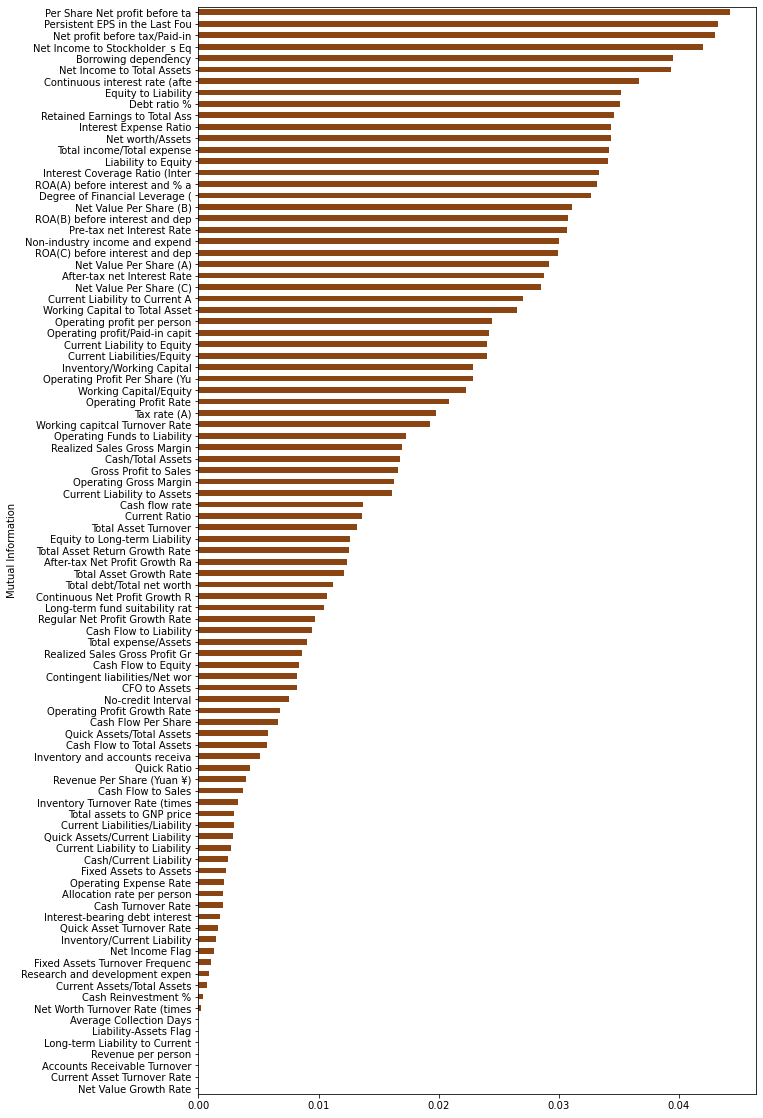

In [12]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=True).plot.barh(figsize=(10, 20), color = '#8B4513')
plt.ylabel('Mutual Information')

In [13]:
# select features
top_features = SelectKBest(mutual_info_classif, k=10) # k = 10
sel_ = top_features.fit(X_train, y_train) 

# display features
X_train.columns[sel_.get_support()]

Index(['Continuous interest rate (afte', 'Persistent EPS in the Last Fou',
       'Per Share Net profit before ta', 'Debt ratio %', 'Net worth/Assets',
       'Borrowing dependency', 'Net profit before tax/Paid-in',
       'Net Income to Total Assets', 'Net Income to Stockholder_s Eq',
       'Equity to Liability'],
      dtype='object')

### Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 3.2 Data Visualization 

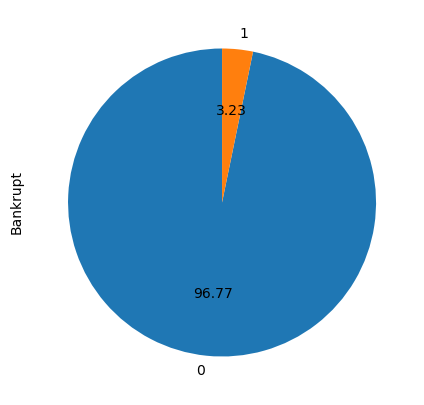

In [14]:
plt.figure(figsize=(5, 5))
data['Bankrupt'].value_counts().plot(kind='pie', autopct="%.2f", startangle = 90)
plt.show();

### 3.3 Imbalanced Data

In [16]:
# Using SMOTE method to over sample the data
x, y = data.drop('Bankrupt',axis=1),data['Bankrupt']
x.shape, y.shape

((6819, 95), (6819,))

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x,y = smote.fit_resample(x,y)

In [18]:
x.shape,y.shape

((13198, 95), (13198,))

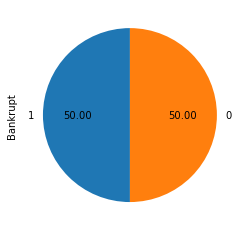

In [19]:
y.value_counts().plot(kind='pie',autopct="%.2f", startangle = 90)
plt.show()

### 3.4 Splitting and training

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Bankrupt'], axis=1),
    data['Bankrupt'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((4773, 95), (2046, 95))

In [21]:
X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

In [22]:
X_train.shape, X_test.shape


((4773, 10), (2046, 10))

### 4. MODEL BUILDING

In [23]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
def Visualize_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Oranges',
                xticklabels=['No Bankruptcy','Bankruptcy'], yticklabels=['No Bankruptcy','Bankruptcy'])
    plt.title('Accuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    print("\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    return

### 4.1 Logistic Regression 

In [25]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
LR_model = LogisticRegression(random_state = 0)
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)
acc1 = accuracy_score(y_test, y_pred)

In [26]:
train_score = LR_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9673


In [30]:
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.0508
Precision score: 0.7500
F1-Score: 0.0952
Accuracy score: 0.9721


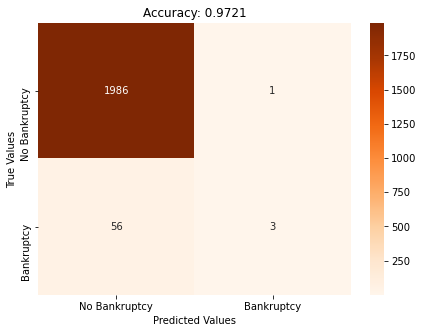



Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1987
           1       0.75      0.05      0.10        59

    accuracy                           0.97      2046
   macro avg       0.86      0.53      0.54      2046
weighted avg       0.97      0.97      0.96      2046



In [31]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

### 4.2 Naive Bayes 

In [32]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
y_pred = NB_model.predict(X_test)
acc2 = accuracy_score(y_test, y_pred)

In [33]:
# Train Score
train_score = NB_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9491


In [34]:
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.5424
Precision score: 0.3333
F1-Score: 0.4129
Accuracy score: 0.9555


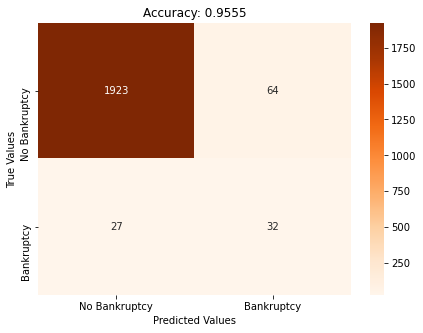



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1987
           1       0.33      0.54      0.41        59

    accuracy                           0.96      2046
   macro avg       0.66      0.76      0.69      2046
weighted avg       0.97      0.96      0.96      2046



In [35]:
Visualize_confusion_matrix(y_test, y_pred)

### 4.3 KNN 

In [36]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(X_train, y_train)
y_pred = KNN_model.predict(X_test)
acc3 = accuracy_score(y_test, y_pred)

In [37]:
train_score = KNN_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9736


In [38]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.1525
Precision score: 0.2571
F1-Score: 0.1915
Accuracy score: 0.9629


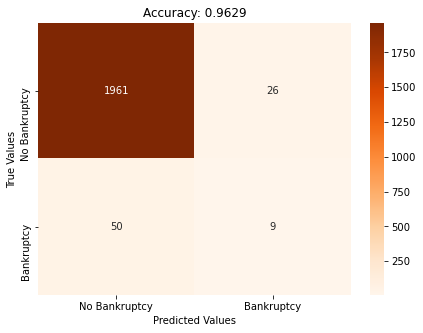



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1987
           1       0.26      0.15      0.19        59

    accuracy                           0.96      2046
   macro avg       0.62      0.57      0.59      2046
weighted avg       0.95      0.96      0.96      2046



In [39]:
Visualize_confusion_matrix(y_test, y_pred)

### 4.4 Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
DTR_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTR_model.fit(X_train, y_train)
y_pred = DTR_model.predict(X_test)
acc4 = accuracy_score(y_test, y_pred)

In [41]:
# Train Score
train_score = DTR_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 1.0000


In [42]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.3390
Precision score: 0.2273
F1-Score: 0.2721
Accuracy score: 0.9477


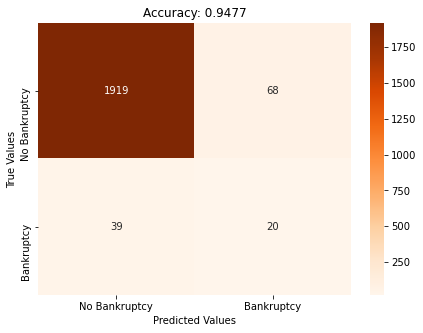



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1987
           1       0.23      0.34      0.27        59

    accuracy                           0.95      2046
   macro avg       0.60      0.65      0.62      2046
weighted avg       0.96      0.95      0.95      2046



In [43]:
Visualize_confusion_matrix(y_test, y_pred)

### 4.5 Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
acc5 = accuracy_score(y_test, y_pred)

In [45]:
# Train Score
train_score = RF_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9948


In [46]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.1525
Precision score: 0.3913
F1-Score: 0.2195
Accuracy score: 0.9687


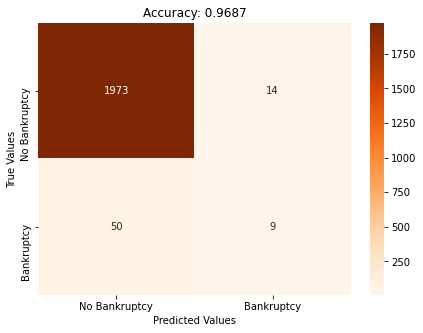



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1987
           1       0.39      0.15      0.22        59

    accuracy                           0.97      2046
   macro avg       0.68      0.57      0.60      2046
weighted avg       0.96      0.97      0.96      2046



In [47]:
Visualize_confusion_matrix(y_test, y_pred)


### 4.6 SVM 

In [48]:
from sklearn.svm import SVC
SVM_model = SVC(kernel = 'linear', random_state = 0, probability=True)
SVM_model.fit(X_train, y_train)
y_pred = SVM_model.predict(X_test)
acc6 = accuracy_score(y_test, y_pred)

In [49]:
# Train Score
train_score = SVM_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9663


In [50]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.0000
Precision score: 0.0000
F1-Score: 0.0000
Accuracy score: 0.9712


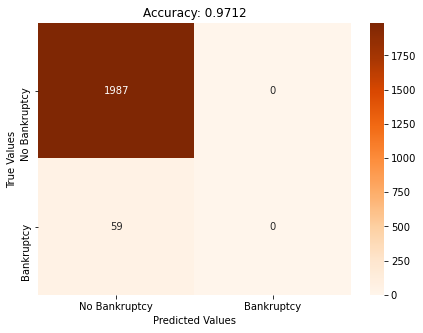



Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1987
           1       0.00      0.00      0.00        59

    accuracy                           0.97      2046
   macro avg       0.49      0.50      0.49      2046
weighted avg       0.94      0.97      0.96      2046



In [51]:
Visualize_confusion_matrix(y_test, y_pred)

### 4.7 XGBoost

In [52]:
!pip install xgboost

In [53]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)
acc7 = accuracy_score(y_test, y_pred)

In [54]:
# Train Score
train_score = XGB_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 1.0000


In [55]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.1864
Precision score: 0.3667
F1-Score: 0.2472
Accuracy score: 0.9673


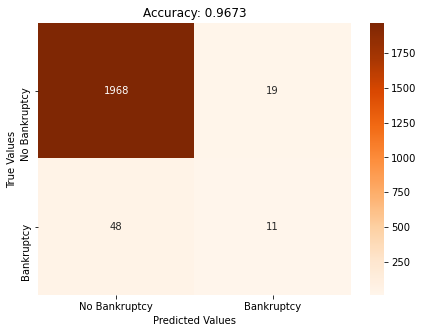



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1987
           1       0.37      0.19      0.25        59

    accuracy                           0.97      2046
   macro avg       0.67      0.59      0.62      2046
weighted avg       0.96      0.97      0.96      2046



In [56]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

# ROC Curve and Area Under the Curve

In [57]:
from sklearn.metrics import roc_curve, auc

In [58]:
y_pred_logistic = LR_model.predict_proba(X_test)[:,1]
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

In [59]:
y_pred_nb = NB_model.predict_proba(X_test)[:,1]
nb_fpr, nb_tpr, threshold = roc_curve(y_test, y_pred_nb)
auc_nb = auc(nb_fpr, nb_tpr)

In [60]:
y_pred_knn = KNN_model.predict_proba(X_test)[:,1]
knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

In [61]:
y_pred_dtr = DTR_model.predict_proba(X_test)[:,1]
dtr_fpr, dtr_tpr, threshold = roc_curve(y_test, y_pred_dtr)
auc_dtr = auc(dtr_fpr, dtr_tpr)

In [62]:
y_pred_rfc = RF_model.predict_proba(X_test)[:,1]
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

In [63]:
y_pred_svm = SVM_model.predict_proba(X_test)[:,1]
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

In [64]:
y_pred_xgb = XGB_model.predict_proba(X_test)[:,1]
xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, y_pred_xgb)
auc_xgb = auc(xgb_fpr, xgb_tpr)

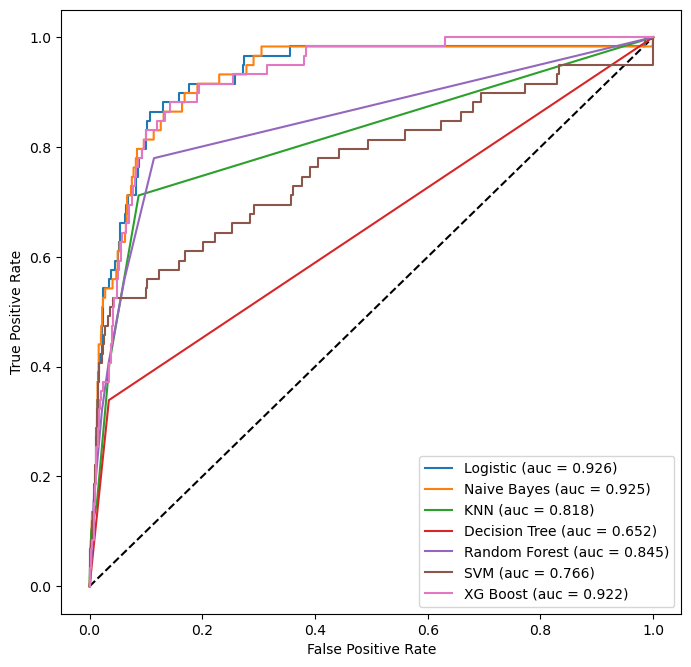

In [65]:
plt.figure(figsize=(8, 8), dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
# Logistic Regression
plt.plot(logistic_fpr, logistic_tpr, label='Logistic (auc = %0.3f)' % auc_logistic)
# Naive Bayes
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (auc = %0.3f)' % auc_nb)
# KNN
plt.plot(knn_fpr, knn_tpr, label='KNN (auc = %0.3f)' % auc_knn)
# Decision Tree
plt.plot(dtr_fpr, dtr_tpr, label='Decision Tree (auc = %0.3f)' % auc_dtr)
# Random Forest
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest (auc = %0.3f)' % auc_rfc)
# SVM
plt.plot(svm_fpr, svm_tpr, label='SVM (auc = %0.3f)' % auc_svm)
# XGBoost
plt.plot(xgb_fpr, xgb_tpr, label='XG Boost (auc = %0.3f)' % auc_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.show();

# RESULT

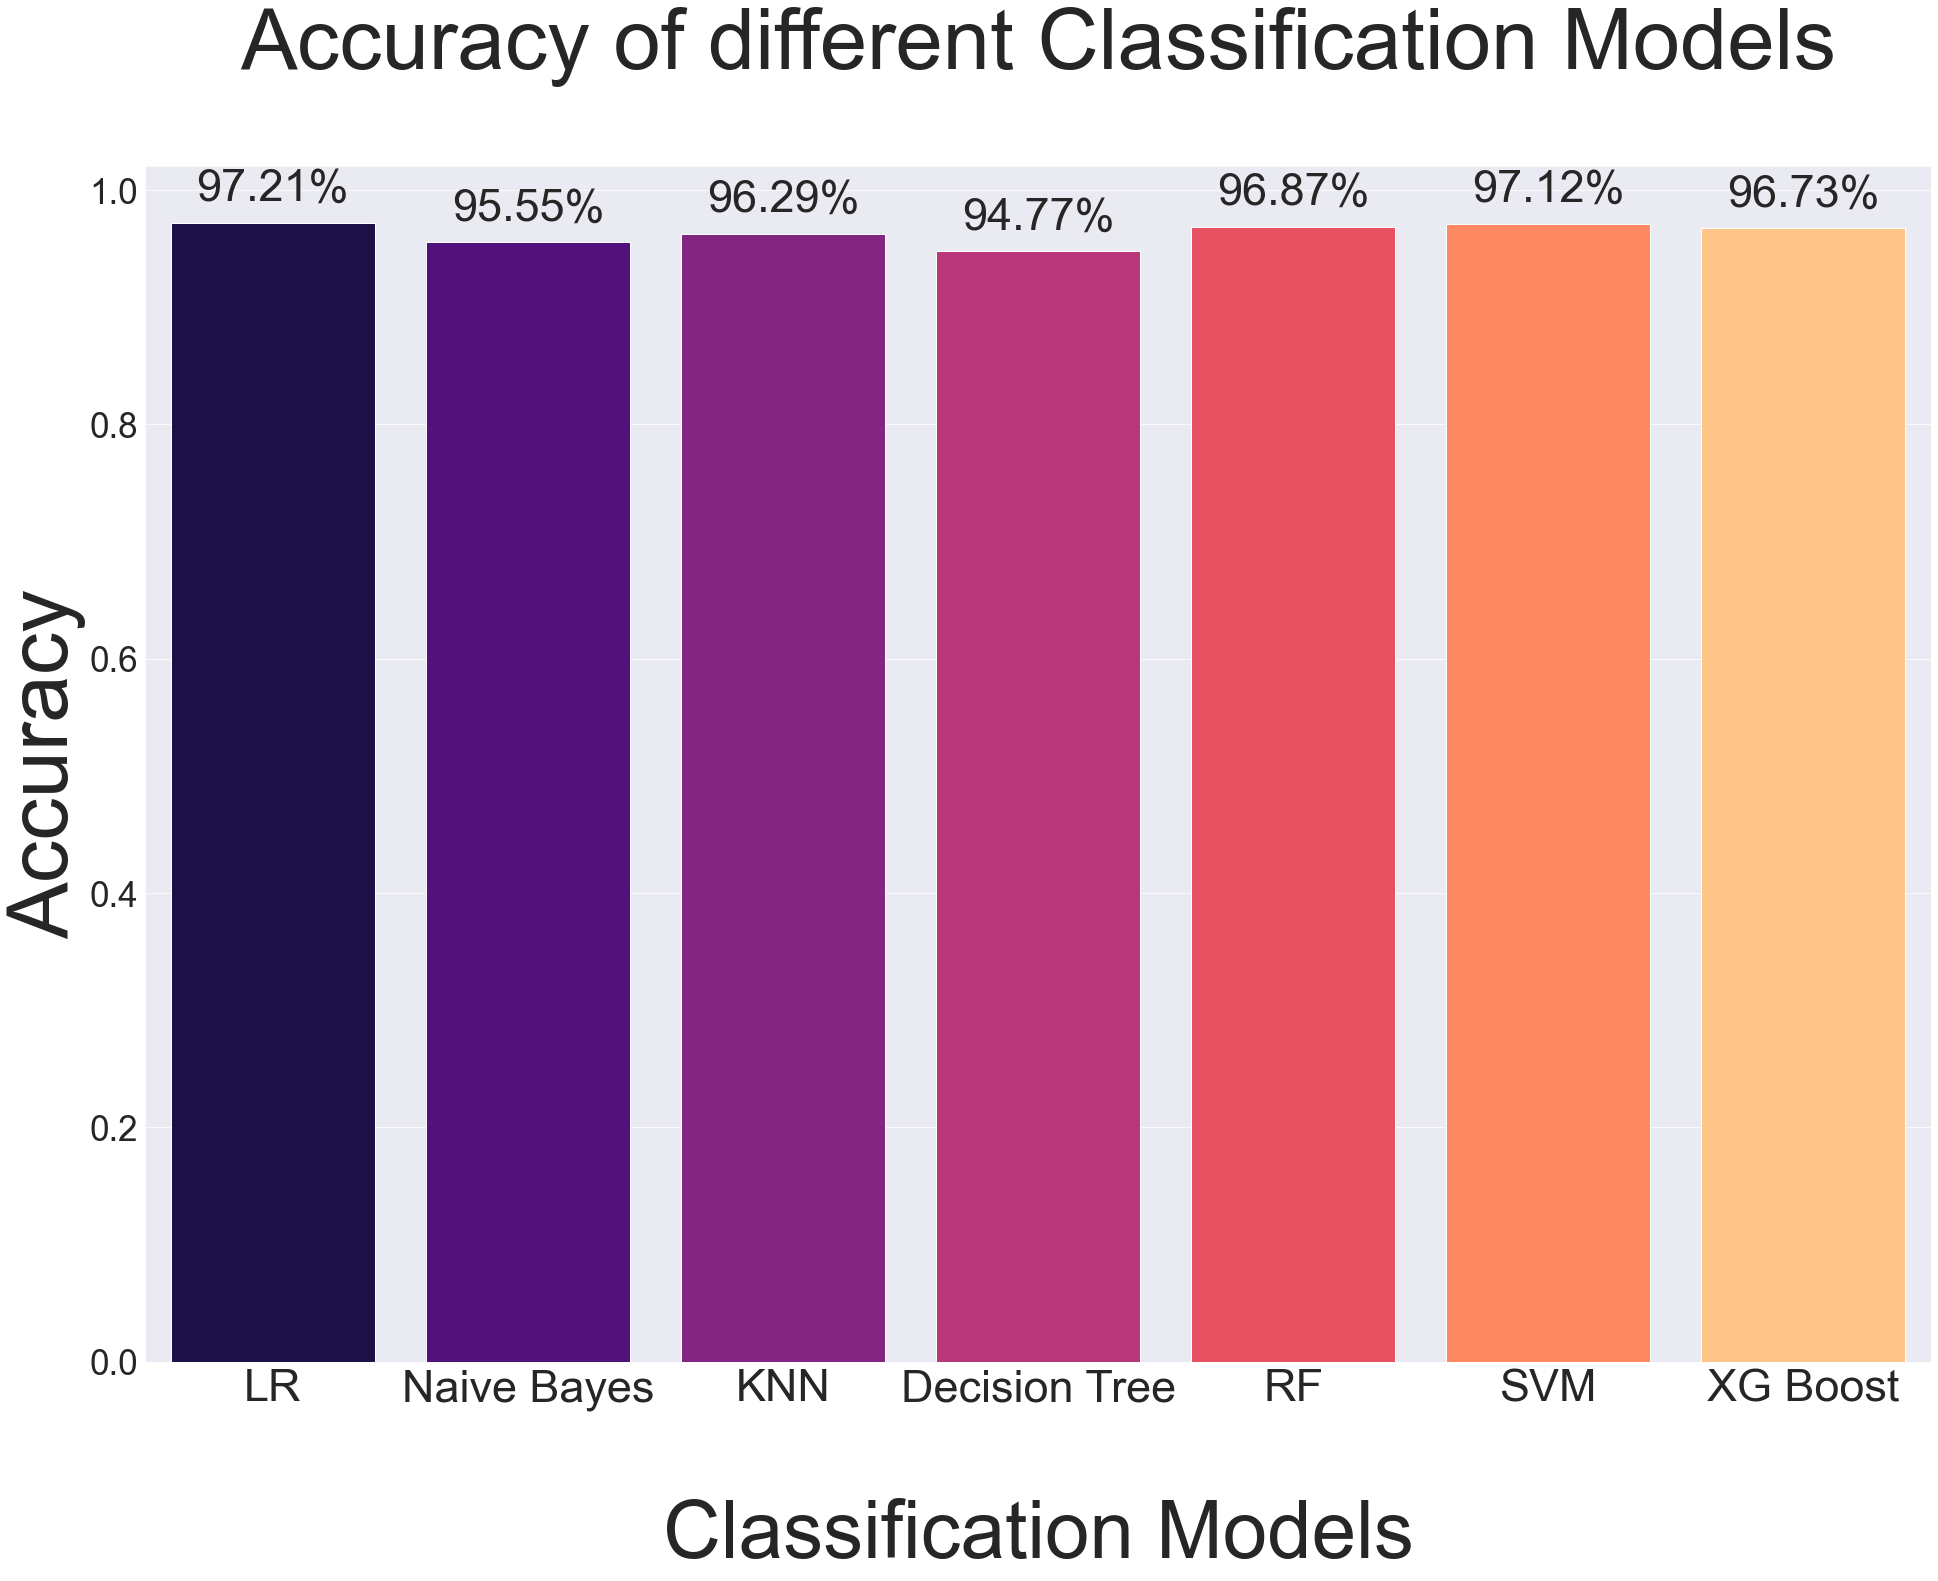

In [66]:
mylist=[]
mylist2=[]

mylist.append(acc1)
mylist2.append("LR")
mylist.append(acc2)
mylist2.append("Naive Bayes")
mylist.append(acc3)
mylist2.append("KNN")
mylist.append(acc4)
mylist2.append("Decision Tree")
mylist.append(acc5)
mylist2.append("RF")
mylist.append(acc6)
mylist2.append("SVM")
mylist.append(acc7)
mylist2.append("XG Boost")

plt.figure(figsize=(32, 22))
sns.set_style("darkgrid")
ax = sns.barplot(x = mylist2, y = mylist, palette = "magma",saturation =55)
plt.xlabel("\nClassification Models", fontsize = 80 )
plt.ylabel("Accuracy", fontsize = 85)
plt.title("Accuracy of different Classification Models\n", fontsize = 85)
plt.xticks(fontsize = 45, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 35)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 45)

    
       
plt.show();